## Week12 exercise: Ocean P cycling
- Objective
- Understand fundamental methods in solving a system of ODEs
- Application to 3 box ocean model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg # linear algebra

### 1. set parameters

In [12]:
# volumes, m3 (cubic meter)
VL = 3e16
VH = 1.6e16
VD = 1.4e18
#
# circulation rates (cubic meter / sec)
C = 6e7
M = 8e7
#
# biological parameter (1/sec)
lda = 3.2e-8
# These are in SI units (mol, m, sec, ...)

In [4]:
# parameter normalized by volume
cL = C/VL
cH = C/VH
cD = C/VD
mH = M/VH
mD = M/VD

In [5]:
# assemble the T matrix
T = np.array([[-(cL+lda), 0, cL],
            [cH, -(cH+mH+lda), mH],
            [lda*VL/VD, cD+mD+lda*VH/VD, -(cD+mD)]
           ])
T

array([[-3.40000000e-08,  0.00000000e+00,  2.00000000e-09],
       [ 3.75000000e-09, -4.07500000e-08,  5.00000000e-09],
       [ 6.85714286e-10,  4.65714286e-10, -1.00000000e-10]])

In [75]:
# time axis : dt = 1 month
dtmonth = 1 # time step in month
mon2sec = 30*24*60*60 # convert months to seconds
dt = mon2sec*dtmonth # time step in seconds
time = np.arange(0,120+dtmonth,dtmonth)
    # in months : 10 year time series
N=np.size(time)
P=np.zeros((3,N))
Pef=np.zeros((3,N)) # Euler Forward
Peb=np.zeros((3,N)) # Euler Backward

# initialize P array for matrix exponential
P0=np.array([2,2,2])
P[:,0] = P0 # mmolP/m3
Pef[:,0] = P0 # mmolP/m3
Peb[:,0] = P0 # mmolP/m3

### 2. Analytical solution: matrix exponential

In [83]:
#optional step: eigenvalues and eigenvectors
#
[L,Q]=linalg.eig(T)
print('Eigen values are: ')
print(L)

print('Eigen vectors are: ')
print(Q)

Eigen values are: 
[-4.07948108e-08+0.j -3.40551892e-08+0.j -7.76236382e-25+0.j]
Eigen vectors are: 
[[-0.00338502 -0.87982019  0.0582476 ]
 [-0.99992814 -0.47468621  0.12685827]
 [ 0.01150029  0.02427828  0.99020917]]


In [76]:
# analytical solution using matrix exponential
for n in range(1,N):
    P[:,n]=linalg.expm(T*time[n]*mon2sec)@P[:,0]

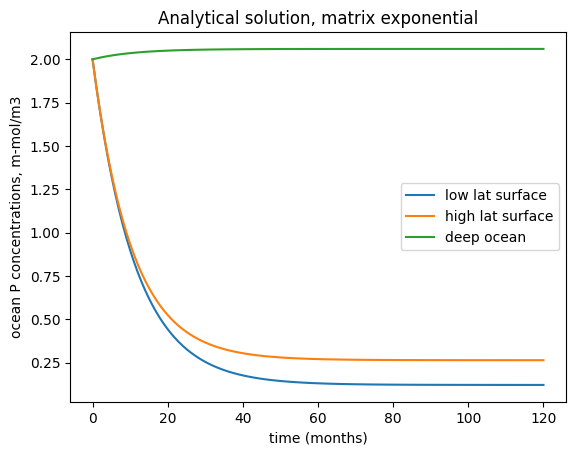

In [77]:
# visualization
fig=plt.figure()
plt.plot(time,P.T)
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean'])
plt.title('Analytical solution, matrix exponential')
plt.show()


### 3. Numerical solution: Euler forward

In [78]:
# numerical solution Euler forward
for n in range(1,N):
    Pef[:,n]=(np.eye(3)+dt*T)@Pef[:,n-1]

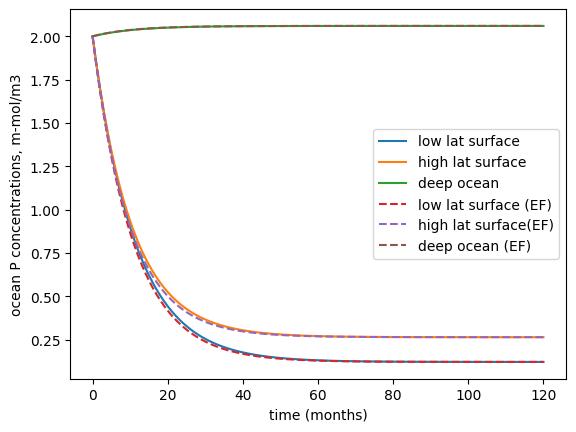

In [79]:
# visualization
fig=plt.figure()
plt.plot(time,P.T)
plt.plot(time,Pef.T,'--')
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)'])
plt.show()

## 4. Numerical solution: Euler backward

In [80]:
# numerical solution Euler backward
M = linalg.inv(np.eye(3)-dt*T)
for n in range(1,N):
    Peb[:,n]=M@Peb[:,n-1]

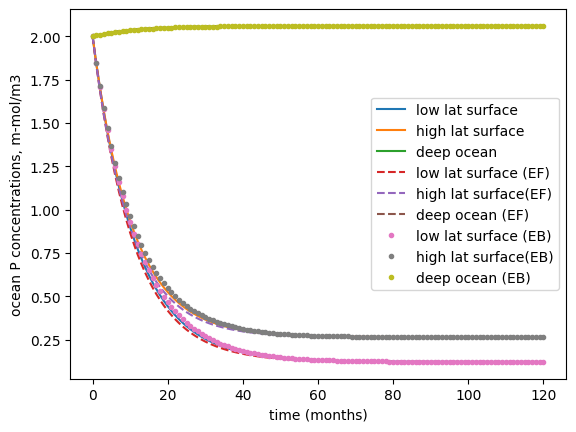

In [81]:
# visualization
fig=plt.figure()
plt.plot(time,P.T)
plt.plot(time,Pef.T,'--')
plt.plot(time,Peb.T,'.')
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)',
           'low lat surface (EB)','high lat surface(EB)','deep ocean (EB)'])

plt.show()

## 5. Steady states


In [97]:
# look for the coefficients for the 3rd eigen mode
c = np.linalg.inv(Q)@P0
# this is the solution that does not change (since eigenvalue is 0)
Pinf = c[2]*Q[:,2]

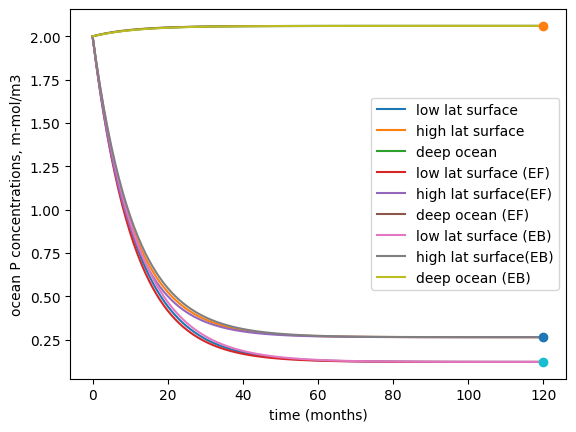

In [100]:
# visualization
fig=plt.figure()
plt.plot(time,P.T)
plt.plot(time,Pef.T)
plt.plot(time,Peb.T)

for n in range(3):
  plt.plot(time[-1],Pinf[n],'o')

plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')


plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)',
           'low lat surface (EB)','high lat surface(EB)','deep ocean (EB)'])

plt.show()